In [1]:
from model import *
from sortedlist import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
sns.set()

In [2]:
L = 100
test = SortedList.fromlist(np.random.randint(0, 4*L, size=L))
test[:25]

[2,
 9,
 12,
 13,
 14,
 18,
 19,
 23,
 28,
 28,
 30,
 31,
 32,
 46,
 51,
 52,
 57,
 59,
 60,
 65,
 83,
 85,
 87,
 90,
 90]

In [3]:
tests = enumerate(test)
testy, testx = zip(*tests)
testx = np.array(list(testx), dtype=np.float64).reshape(-1,1,1)
testy = np.array(list(testy), dtype=np.float64).reshape(-1,1,1)
dataset = tf.data.Dataset.from_tensor_slices((testx, testy))
dataset = dataset.shuffle(L)
dataset, len(dataset)

(<ShuffleDataset shapes: ((1, 1), (1, 1)), types: (tf.float64, tf.float64)>,
 100)

In [7]:
from matplotlib.patches import Rectangle
n_epochs=5
model = build_fit_rmi_model(dataset, stages=(1,2,4,5), n_neurons=32, n_epochs=n_epochs, verbose='auto', optimizer=keras.optimizers.Adam(learning_rate=5e-3), loss='mse', metrics=[MaxAbsoluteError()])
preds, lf = predict_rmi_model(model, testx, with_leaf=True)
lf, lfcounts = np.unique(lf, return_counts=True)
mkrs = [(0,0)]
for li in lfcounts:
    mkrs.append((mkrs[-1][1],mkrs[-1][1] + li - 1))
mkrs = mkrs[1:]
mkhts = [(preds[mi[0]], preds[mi[1]]) for mi in mkrs]
fig, ax = plt.subplots()
seps = np.arange(0, len(testx), 2)
linax = ax.twinx()
linax.set_ylabel("Placement of Index")
linax.set_ylim(0, len(testx))
linax.plot(range(len(testx)), range(len(testx)), linestyle='dotted', lw=2)
linax.plot(range(len(testx)), preds, lw=2, c='r')
linax.plot(range(len(testx)), abs(testy.reshape(-1)-preds.reshape(-1)), lw=0.8, c='k')
ax.hist(preds.reshape(-1), bins=seps, alpha=0.4, label='Predicted')
ax.hist(testy.reshape(-1), bins=seps, alpha=0.4, label='Actual')
ax.set_title(f"Prediction Distribution for RMI Model ($E={n_epochs}$)")
ax.set_xlabel("Returned Index")
ax.set_ylabel("Frequency")
ax.set_ylim(0,5)
# ax.vlines(mkrs, ymin=0, ymax=5, colors='k')
for m in range(len(mkrs)):
    linax.add_patch(Rectangle((mkrs[m][0], mkhts[m][0]), mkrs[m][1]-mkrs[m][0], mkhts[m][1] - mkhts[m][0], facecolor='none', edgecolor='k', linestyle='dotted'))
fig.set_size_inches((12,8))
plt.show()

Epoch 1/5
100/100 [==============================] - 0s 2ms/step - loss: 9117.4805 - max_absolute_error: 256.7462
Epoch 2/5
100/100 [==============================] - 0s 1ms/step - loss: 588.5677 - max_absolute_error: 57.8856
Epoch 3/5
100/100 [==============================] - 0s 2ms/step - loss: 63.6760 - max_absolute_error: 19.5952
Epoch 4/5
100/100 [==============================] - 0s 2ms/step - loss: 8.9528 - max_absolute_error: 6.8510
Epoch 5/5
100/100 [==============================] - 0s 2ms/step - loss: 3.7891 - max_absolute_error: 4.8415
[i=0,j=0,p=0]len(subset)=47
[i=0,j=0,p=1]len(subset)=52
Epoch 1/5
47/47 [==============================] - 0s 2ms/step - loss: 3.5610 - max_absolute_error: 4.8415
Epoch 2/5
47/47 [==============================] - 0s 2ms/step - loss: 3.4628 - max_absolute_error: 4.0753
Epoch 3/5
47/47 [==============================] - 0s 2ms/step - loss: 3.4492 - max_absolute_error: 4.0170
Epoch 4/5
47/47 [==============================] - 0s 2ms/step - los

IndexError: list index out of range

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


AttributeError: 'list' object has no attribute 'reshape'

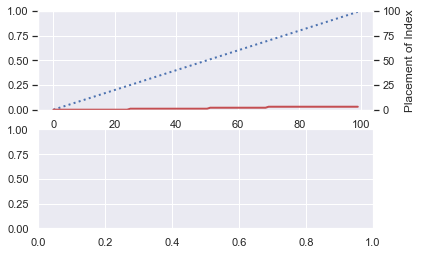

In [4]:
cumloss = []
max_epoch = 50
for n_epochs in range(1,max_epoch+1):
    model = build_fit_rmi_model(dataset, n_neurons=128, n_epochs=n_epochs, optimizer=keras.optimizers.Adam(learning_rate=5e-3), loss='mse', verbose=0)

    preds = predict_rmi_model(model, testx)
    mse = keras.metrics.MeanSquaredError()
    mse.update_state(preds, testy.reshape(-1,1))
    cumloss.append(mse.result().numpy())
    
    c = np.c_[preds, testy.reshape(-1,1)]

    fig, (ax, lax) = plt.subplots(2,1)
    seps = np.arange(0, len(testx), 2)
    linax = ax.twinx()
    linax.set_ylabel("Placement of Index")
    linax.set_ylim(0, len(testx))
    linax.plot(range(len(testx)), range(len(testx)), linestyle='dotted', lw=2)
    linax.plot(range(len(testx)), preds, lw=2, c='r')
    ax.hist(preds.reshape(-1), bins=seps, alpha=0.4, label='Predicted')
    ax.hist(testy.reshape(-1), bins=seps, alpha=0.4, label='Actual')
    ax.set_title(f"Prediction Distribution for RMI Model ($E={n_epochs}$)")
    ax.set_xlabel("Returned Index")
    ax.set_ylabel("Frequency")
    ax.set_ylim(0,5)
    ax.legend(loc='upper left')
    lax.plot(range(len(cumloss)), np.log10(cumloss), c='k')
    lax.set_title("LogMSE Over Epochs")
    lax.set_xlabel("# Epoch")
    lax.set_ylabel("LogMSE")
    lax.set_xlim(0,max_epoch)
    lax.set_ylim(0,5)
    fig.set_size_inches((12,12))
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"modeling_imgs/n_epochs_{n_epochs}.png")
    plt.close()
    print(f"{n_epochs}...", end=' ')

In [5]:
exm = new_stage_model(n_neurons=8, n_layers=1)
# exm.add_metric(keras.metrics.Sum(name='sum1')(exm.outputs), name='sum')
exm.compile(loss='mse', optimizer='adam', 
            metrics=[MaxAbsoluteError()])
exhist = exm.fit(dataset, epochs=100)
mape = exhist.history['max_absolute_error']
los = exhist.history['loss']
fig, (mapeax, lax, hax) = plt.subplots(3,1)
mapeax.plot(range(len(mape)), mape)
mapeax.set_title("MaxAE in training")
mapeax.set_xlabel("Epoch #")
mapeax.set_xticks(range(0,len(mape),5))
mapeax.set_ylabel("MaxAE")
lax.plot(range(len(mape)), los)
lax.set_title("MSE Loss in training")
lax.set_xlabel("Epoch #")
lax.set_xticks(range(0,len(mape),5))
lax.set_ylabel("MSE Loss")
lax.set_yscale('log')
preds = exm.predict(testx) + 1
seps = np.arange(0,L,max(1,L//25))
hax.hist(preds.reshape(-1), bins=seps, alpha=0.4, label='Predicted')
hax.hist(testy.reshape(-1), bins=seps, alpha=0.4, label='Actual')
hax.set_title("Key Distribution")
hax.set_xlim(0,L)
hax.set_ylim(0,L//2)
hax.set_xlabel("Key index")
hax.set_ylabel("Frequency")
hax.legend()
fig.set_size_inches((12,12))
plt.tight_layout()
plt.show()

Epoch 1/100
5000/5000 [==============================] - ETA: 0s - loss: 3810654.7500 - max_absolute_error: 13687.5898 ETA: 0s - loss: 4348633.0000 -  - 8s 1ms/step - loss: 3776359.7500 - max_absolute_error: 13687.5898
Epoch 2/100
5000/5000 [==============================] - 6s 1ms/step - loss: 231.0148 - max_absolute_error: 43.8812
Epoch 3/100
5000/5000 [==============================] - 6s 1ms/step - loss: 255.7868 - max_absolute_error: 53.9753A: 1s - loss: 242.7464 - max_absolute_error - ETA: 1s - loss: 246.4148 - max_absolute_error: 43.60 - ETA: 1s - loss: 246.8089 -
Epoch 4/100
5000/5000 [==============================] - 6s 1ms/step - loss: 267.2081 - max_absolute_error: 60.7070
Epoch 5/100
5000/5000 [==============================] - 6s 1ms/step - loss: 241.9344 - max_absolute_error: 60.1689A: 0s - loss: 243.3635 - max_absolute_error: 
Epoch 6/100
5000/5000 [==============================] - 6s 1ms/step - loss: 231.2430 - max_absolute_error: 74.7393A: 0s - loss: 229.2930 - max_a

KeyboardInterrupt: 

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices()

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]